<a href="https://colab.research.google.com/github/daka13/HowLLMsWork/blob/main/my_git_image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate text from an image

This is based on [this example](https://huggingface.co/docs/transformers/main/model_doc/git#transformers.GitForCausalLM.forward.example) from the Microsoft GIT image model.



In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

# additional model for reading text in images
#processor_vqa = AutoProcessor.from_pretrained("microsoft/git-base-textvqa")
#model_vqa = AutoModelForCausalLM.from_pretrained("microsoft/git-base-textvqa")


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
url = "https://i.pinimg.com/600x315/bf/bd/6f/bfbd6f305a456162849385ed16873b39.jpg"
image = Image.open(requests.get(url, stream=True).raw)

pixel_values = processor(images=image, return_tensors="pt").pixel_values


In [ ]:
image.size

(500, 315)

In [ ]:
pixel_values.shape

torch.Size([1, 3, 224, 224])

In [ ]:

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

the bear's head is brown


In [ ]:
def load_image(filename, scaling=3):
  with Image.open(filename) as img:
    img.load()
    if scaling != 1.0:
      img = img.resize( (img.width // scaling, img.height // scaling) )
  return img

Baldwin_the_eagle = load_image("Baldwin.jpeg")

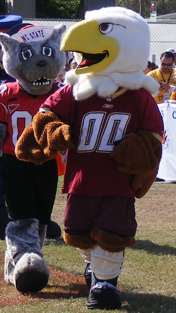

In [ ]:
Baldwin_the_eagle

In [ ]:
pixel_values = processor(images=Baldwin_the_eagle, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

mascots and mascots walking on the field.


In [ ]:

question = "what are they doing?"

input_ids = processor_vqa(text=question, add_special_tokens=False).input_ids
input_ids = [processor_vqa.tokenizer.cls_token_id] + input_ids
input_ids = torch.tensor(input_ids).unsqueeze(0)

generated_ids = model_vqa.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=100)
print(processor_vqa.batch_decode(generated_ids, skip_special_tokens=True))

NameError: ignored

In [ ]:
model